In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [134]:
# load dataset
df = pd.read_csv('merged_data_1.csv')

In [135]:
df.head()

,Site 1 EC Inv,Site 1 IE Inv,datetime,RF mm (GMT),Tide Astronomical (MaOD),Spring High,Spring Low,Neap High,Neap low,Flow (l/s),UV Transmittance 1,UV Applied Dose_1,UVIndex,Wind_Sp,Wind_Dir
0,10,18,2023-06-20 13:00:00,0.0,-1.60,3.3,-2.87,1.14,-0.27,91.25272,53.797,149.158,3.0,4.79,70.0
1,8,2,2023-06-28 09:45:00,0.0,1.40,3.3,-2.87,1.14,-0.27,80.38680,49.695,173.040,NaN,NaN,NaN
2,80,340,2023-07-11 07:00:00,0.0,1.52,3.3,-2.87,1.14,-0.27,55.27911,45.910,200.000,2.0,4.52,247.0
3,85,310,2023-07-11 07:30:00,0.4,1.52,3.3,-2.87,1.14,-0.27,55.27911,45.910,200.000,NaN,NaN,NaN
4,20,26,2023-07-11 08:00:00,0.0,1.52,3.3,-2.87,1.14,-0.27,55.27911,45.910,200.000,3.0,4.82,237.0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Site 1 EC Inv             115 non-null    int64  
 1   Site 1 IE Inv             115 non-null    int64  
 2   datetime                  115 non-null    object 
 3   RF mm (GMT)               115 non-null    float64
 4   Tide Astronomical (MaOD)  115 non-null    float64
 5   Spring High               115 non-null    float64
 6   Spring Low                115 non-null    float64
 7   Neap High                 115 non-null    float64
 8   Neap low                  115 non-null    float64
 9   Flow (l/s)                115 non-null    float64
 10  UV Transmittance 1        115 non-null    float64
 11  UV Applied Dose_1         115 non-null    float64
 12  UVIndex                   61 non-null     float64
 13  Wind_Sp                   61 non-null     float64
 14  Wind_Dir  

In [137]:
df.describe()

,Site 1 EC Inv,Site 1 IE Inv,RF mm (GMT),Tide Astronomical (MaOD),Spring High,Spring Low,Neap High,Neap low,Flow (l/s),UV Transmittance 1,UV Applied Dose_1,UVIndex,Wind_Sp,Wind_Dir
count,115.000000,115.000000,115.000000,115.000000,1.150000e+02,115.00,115.00,115.00,115.000000,115.000000,115.000000,61.000000,61.000000,61.000000
mean,103.469565,110.243478,0.013913,-0.240261,3.300000e+00,-2.87,1.14,-0.27,125.646690,53.986478,136.513565,3.344262,5.274754,207.311475
std,145.147071,106.864695,0.063366,1.425812,4.460327e-16,0.00,0.00,0.00,82.932557,8.198934,54.665549,1.364860,1.556180,103.664932
min,8.000000,2.000000,0.000000,-2.020000,3.300000e+00,-2.87,1.14,-0.27,55.279110,45.910000,45.568000,1.000000,1.900000,9.000000
25%,14.000000,27.000000,0.000000,-1.930000,3.300000e+00,-2.87,1.14,-0.27,62.241750,47.009000,100.513000,2.000000,4.170000,106.000000
50%,36.000000,68.000000,0.000000,0.630000,3.300000e+00,-2.87,1.14,-0.27,91.780210,52.601000,146.081000,3.000000,5.590000,236.000000
75%,125.000000,167.000000,0.000000,1.120000,3.300000e+00,-2.87,1.14,-0.27,137.248330,65.104000,200.000000,4.000000,6.460000,271.000000
max,590.000000,580.000000,0.400000,1.520000,3.300000e+00,-2.87,1.14,-0.27,300.659300,65.299000,200.000000,6.000000,8.640000,346.000000


coloumns of 'Spring High', 'Spring Low', 'Neap High', 'Neap low' will be dropped because of zero variation.

In [138]:
cols_to_drop = ['Spring High', 'Spring Low', 'Neap High', 'Neap low']
df_filtered =df.drop(columns=cols_to_drop)

## EC Inv

In [139]:
# select variables
dependent = 'Site 1 EC Inv'
independents = ['RF mm (GMT)', 'Tide Astronomical (MaOD)', 'Flow (l/s)', 
                'UV Transmittance 1', 'UV Applied Dose_1', 'UVIndex', 'Wind_Sp', 'Wind_Dir']

In [140]:
df2 = df_filtered[[dependent] + independents].copy()

In [141]:
# Pearson correlation
corr_matrix = df2.corr(method='pearson')

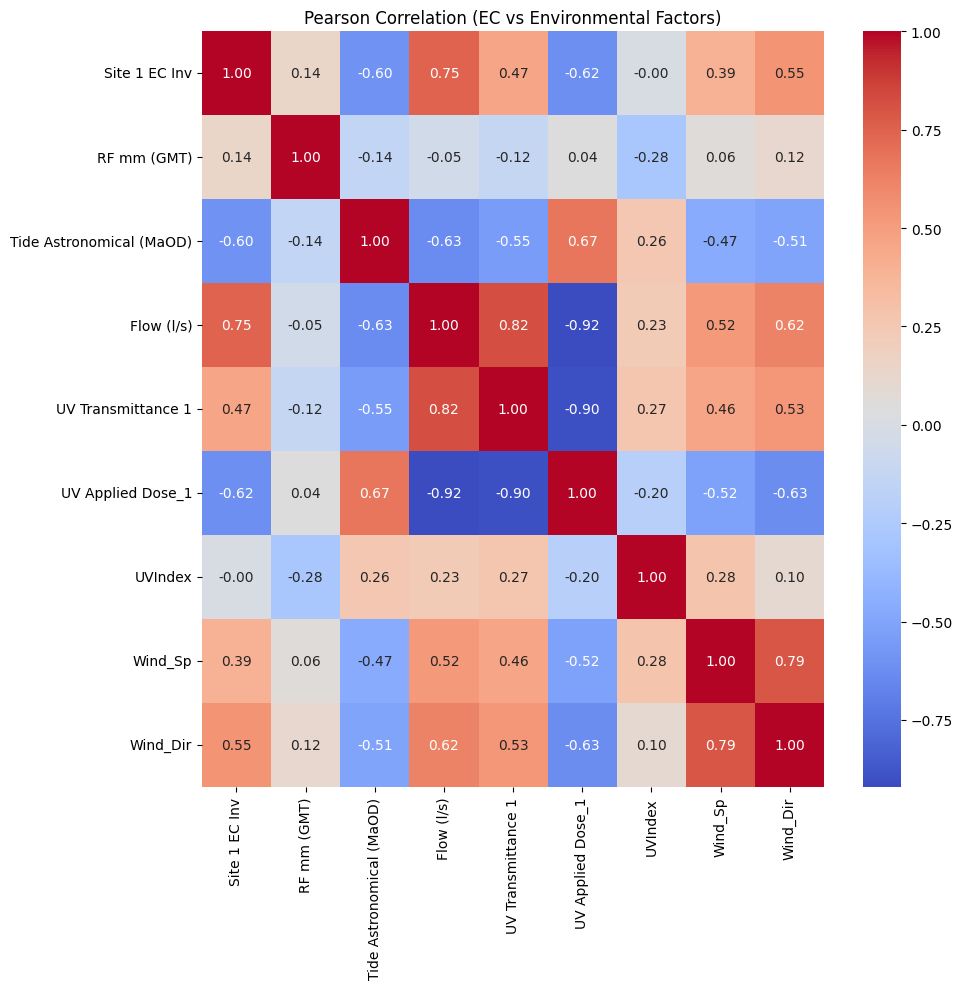

In [142]:
# plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation (EC vs Environmental Factors)')
plt.tight_layout()
plt.show()

variables with correlation above 0.8 will be dropped:

In [143]:
# Drop highly correlated variables
cols_to_drop = ['UV Transmittance 1', 'UV Applied Dose_1']
df3 = df2.drop(columns=cols_to_drop)

### OLS

In [144]:
# Drop rows with missing values
df_clean = df3.dropna()

In [145]:
# Define dependent and independent variables
y = df_clean['Site 1 EC Inv']
X = df_clean.drop(columns='Site 1 EC Inv')

In [146]:
# Add a constant for the intercept
X = sm.add_constant(X)

In [147]:
# Fit OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     20.07
Date:                Wed, 07 May 2025   Prob (F-statistic):           3.56e-12
Time:                        10:36:44   Log-Likelihood:                -353.83
No. Observations:                  61   AIC:                             721.7
Df Residuals:                      54   BIC:                             736.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The model had a strong overall fit, with an R² of 0.690, meaning it explained about 69% of the variance in E. coli levels.

Two variables stood out as statistically significant predictors (p < 0.05):
- RF mm GMT 
- Flow (l/s) 

Other variables like Tide Astronomical (MaOD), UVIndex, Wind_Sp and Wind_Dir did not show statistically significant effects (p-values > 0.05).


To make the model simpler and more focused, I’m now rerunning it using only the significant independents:

In [148]:
# Select only the significant independents and the dependent variable
sig_cols = ['Site 1 EC Inv', 'RF mm (GMT)', 'Flow (l/s)']
df_sig = df_clean[sig_cols].dropna()

In [149]:
# Define y and X
y = df_sig['Site 1 EC Inv']
X = df_sig.drop(columns='Site 1 EC Inv')

In [150]:
# Add a constant for the intercept
X = sm.add_constant(X)

In [151]:
# Fit the OLS model
model_sig = sm.OLS(y, X).fit()


print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     61.65
Date:                Wed, 07 May 2025   Prob (F-statistic):           4.42e-15
Time:                        10:36:44   Log-Likelihood:                -354.83
No. Observations:                  61   AIC:                             715.7
Df Residuals:                      58   BIC:                             722.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -79.9787     19.867     -4.026      

Model achieved a strong R² = 0.680, meaning it explains 68% of the variation in E. coli levels.

Both predictors were highly statistically significant (p < 0.05):

- RF mm (GMT) has a large positive effect: for every additional mm of rainfall, E. coli levels increase almost 1194 units.

- Flow also has a strong positive relationship: each 1 l/s increase in flow is associated with almost 1.36 more E. coli units.

The F-statistic (p < 0.0001) indicates the model as a whole is highly statistically significant.

Now, I want to check on models assumptions:

#### Linearity check

In [152]:
# Predicted values from the GLSAR model
y_pred = model_sig.predict(X)

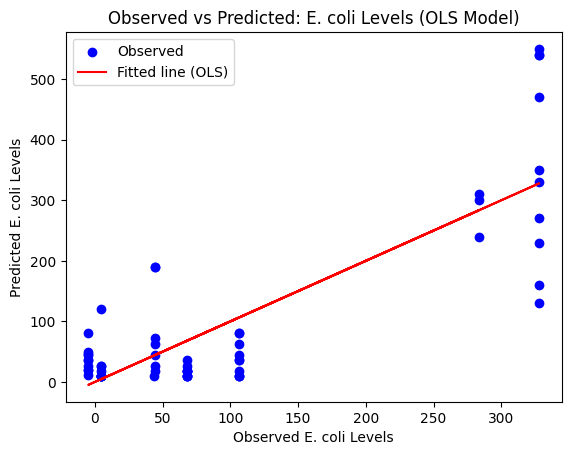

In [153]:
# Scatter plot of observed vs predicted values
plt.scatter(y_pred, y, color='blue', label='Observed')
plt.plot(y_pred, y_pred, color='red', label='Fitted line (OLS)') # red line
plt.title('Observed vs Predicted: E. coli Levels (OLS Model)')
plt.xlabel('Observed E. coli Levels')
plt.ylabel('Predicted E. coli Levels')
plt.legend()
plt.show()

Although the plot shows some clustering, this may be due to gaps in observed values, especially around the mid-range (~150–250), rather than an actual model issue.
Therefore, the pattern does not clearly violate OLS assumptions at this stage and I will continue checking other model assumptions.


#### Homoscedasticity check


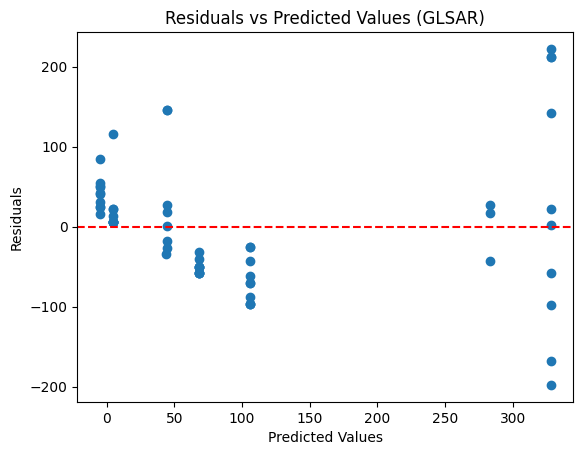

In [154]:
# Residuals from OLS model
residuals= residuals = y - y_pred

# Residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (GLSAR)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Vertical clusters of residuals are obvious around specific values (e.g., around 0, 50, 100, 300). However, this can be due to fitted values not being continuously spread — likely due to repeated or grouped values in the predictor variables.
However, I think it will not violate the OLS assumptions since it is due to initial data input limitations and not necesarily the residuals.


#### Normality of residuals

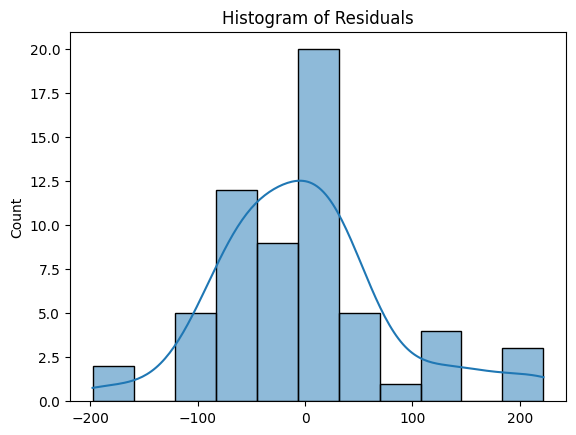

In [155]:
model_sig = sm.OLS(y, X).fit()
residuals = model_sig.resid

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

The residuals create close to bell-shaped distribution which supports the normality assumption for residuals.

In [156]:
#X = sm.add_constant(X)
#model_sig = sm.OLS(y, X).fit()
#residuals = model_sig.resid

# Q-Q plot 
#sm.qqplot(residuals, line='45')
#plt.title('Q-Q Plot of Residuals')
#plt.show()

Since the residuals seems odd and I have seen previous versions, used Open AI to another way of Q-Q plotting:

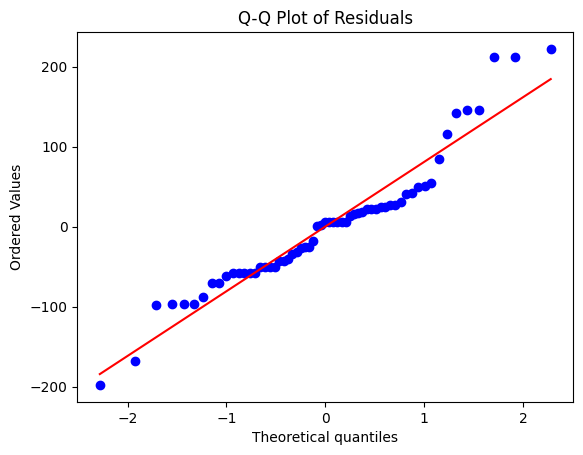

In [157]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [158]:
# Check unexpected odd results
print(residuals.describe())        
print(model_sig.resid.describe())    

count    6.100000e+01
mean    -7.283133e-11
std      8.196102e+01
min     -1.979229e+02
25%     -5.001087e+01
50%      5.535905e+00
75%      2.666667e+01
max      2.220771e+02
dtype: float64
count    6.100000e+01
mean    -7.283133e-11
std      8.196102e+01
min     -1.979229e+02
25%     -5.001087e+01
50%      5.535905e+00
75%      2.666667e+01
max      2.220771e+02
dtype: float64


The problem is with sm.qq and the X and residuals are not in a wrong disorder (restarted the notebook also)

All in all, the residuals follow the red line, especially in the center. However, there is some deviations at the tails.

## IE Inv

In [194]:
# select variables
dependent = 'Site 1 IE Inv'
independents = ['RF mm (GMT)', 'Tide Astronomical (MaOD)', 'Flow (l/s)', 
                'UV Transmittance 1', 'UV Applied Dose_1', 'UVIndex', 'Wind_Sp', 'Wind_Dir']

In [195]:
df2 = df_filtered[[dependent] + independents].copy()

In [196]:
# Pearson correlation
corr_matrix = df2.corr(method='pearson')

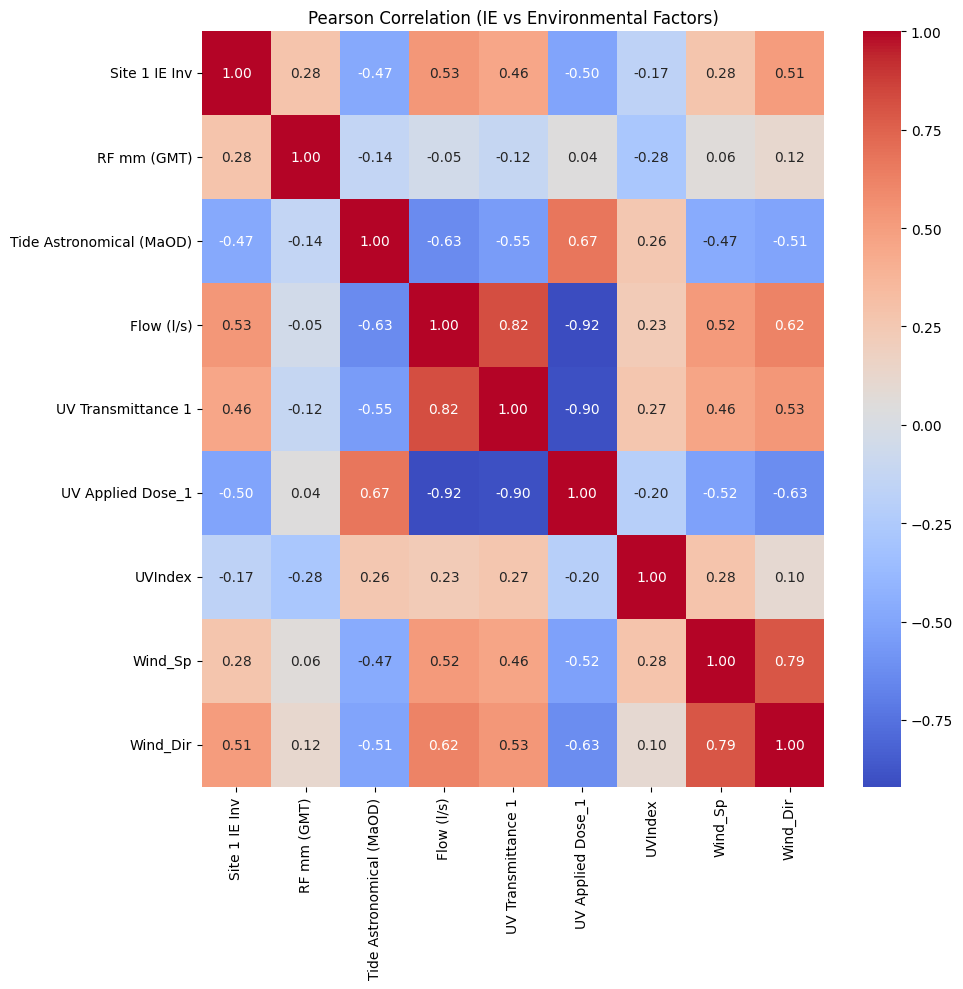

In [197]:
# plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation (IE vs Environmental Factors)')
plt.tight_layout()
plt.show()

variables with correlation above 0.8 will be dropped:

In [198]:
# Drop highly correlated variables
cols_to_drop = ['UV Transmittance 1', 'UV Applied Dose_1']
df3 = df2.drop(columns=cols_to_drop)

### OLS

In [199]:
# Drop rows with missing values
df_clean = df3.dropna()

In [200]:
# Define dependent and independent variables
y = df_clean['Site 1 IE Inv']
X = df_clean.drop(columns='Site 1 IE Inv')

In [201]:
# Add a constant for the intercept
X = sm.add_constant(X)

In [203]:
# Fit OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     9.830
Date:                Wed, 07 May 2025   Prob (F-statistic):           2.60e-07
Time:                        11:43:22   Log-Likelihood:                -351.50
No. Observations:                  61   AIC:                             717.0
Df Residuals:                      54   BIC:                             731.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The model shows an almost moderate (to weak) fit, with an R² of 0.522, meaning it explained about 52% of the variance in IE levels.

Three variables showed statistically significant (p < 0.05) and with positive association with IE :
- RF mm (GMT) 
- Flow (l/s)
- Wind_Dir

Other variables like Tide Astronomical (MaOD), UVIndex Wind_Sp did not show statistically significant effects (p-values > 0.05).


To make the model simpler and more focused, I’m now rerunning it using only the significant independents:

In [ ]:
# Select only the significant independents and the dependent variable
#sig_cols = ['Site 1 IE Inv', 'RF mm (GMT)', 'Flow (l/s)', 'Wind_Dir']
#df_sig = df_clean[sig_cols].dropna()

In [ ]:
# Define y and X
#y = df_sig['Site 1 IE Inv']
#X = df_sig.drop(columns='Site 1 IE Inv')

In [ ]:
# Add a constant for the intercept
#X = sm.add_constant(X)

In [ ]:
# Fit the OLS model
#model_sig = sm.OLS(y, X).fit()


#print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     16.51
Date:                Wed, 07 May 2025   Prob (F-statistic):           7.73e-08
Time:                        10:36:45   Log-Likelihood:                -354.95
No. Observations:                  61   AIC:                             717.9
Df Residuals:                      57   BIC:                             726.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.5430     24.574     -0.673      

Despite the statistically valid (Prob (F-statistic) < 0.05) model, it doesn't predict IE levels very well (R2 is even less than 0.5).

So, the OLS on all non highly correlated variables was a better choice:

#### Linearity check

In [204]:
# Predicted values from the GLSAR model
y_pred = model.predict(X)

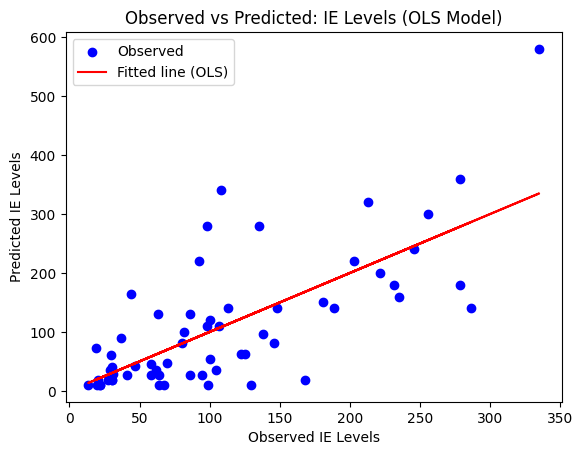

In [205]:
# Scatter plot of observed vs predicted values
plt.scatter(y_pred, y, color='blue', label='Observed')
plt.plot(y_pred, y_pred, color='red', label='Fitted line (OLS)') # red line
plt.title('Observed vs Predicted: IE Levels (OLS Model)')
plt.xlabel('Observed IE Levels')
plt.ylabel('Predicted IE Levels')
plt.legend()
plt.show()

#### Homoscedasticity check


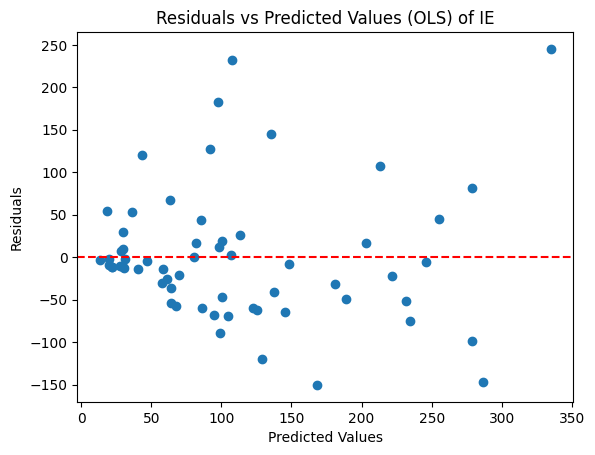

In [206]:
# Residuals from OLS model
residuals= y - y_pred

# Residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (OLS) of IE')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Normality of residuals

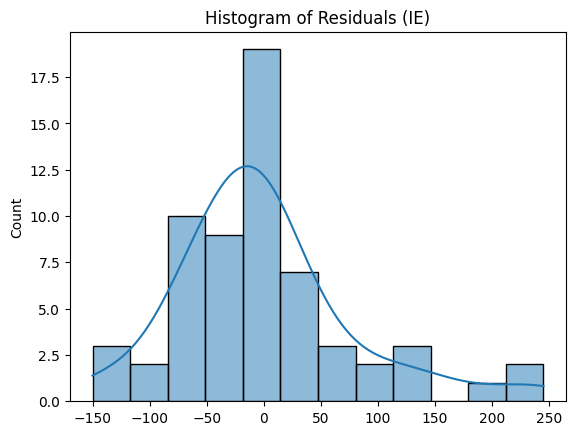

In [207]:
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals (IE)')
plt.show()

The residuals create close to bell-shaped distribution, yet skewed a little.

In [210]:
# Q-Q plot 
#sm.qqplot(residuals, line='45')
#plt.title('Q-Q Plot of Residuals')
#plt.show()

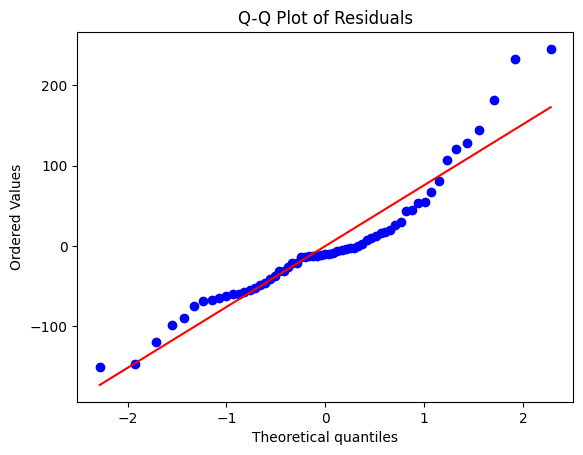

In [209]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


###  logarithmic model 

In [172]:
import numpy as np

# Apply log transformation (add 1 to avoid log(0))  # by Generative AI!
df_clean['log_IE'] = np.log1p(df_clean['Site 1 IE Inv'])

/var/folders/wd/1wf586s93vg1fbnl295w_w1r0000gn/T/ipykernel_50436/2559393213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_IE'] = np.log1p(df_clean['Site 1 IE Inv'])


In [173]:
# define X and y
y_log = df_clean['log_IE']
X_log = df_clean.drop(columns=['Site 1 IE Inv', 'log_IE'])

In [174]:
# add constant
X_log = sm.add_constant(X_log)

In [175]:
# fit the model
model_log = sm.OLS(y_log, X_log).fit()

print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_IE   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     10.62
Date:                Wed, 07 May 2025   Prob (F-statistic):           9.16e-08
Time:                        10:36:45   Log-Likelihood:                -68.539
No. Observations:                  61   AIC:                             151.1
Df Residuals:                      54   BIC:                             165.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The model looks better now:
R-squared is improved (0.541), however it is only around the linear OLS models (R-squared: 0.522) I will select only the significant variables and rerun the model

In [176]:
# select significant predictors
#selected_columns = ['Flow (l/s)', 'Wind_Dir']

In [177]:
#y_log = df_clean['log_IE']
#X_sig = df_clean[selected_columns]

In [178]:
# add constant
#X_sig = sm.add_constant(X_sig)

In [179]:
# fit model
#model_sig = sm.OLS(y_log, X_sig).fit()

#print(model_sig.summary())

Considering the R-squared value of 0.444, which is not acceptable also lower than the previous model with all non-correlated variables, creating this model was not a good idea. :)

Also comparing the OLS and the logarithmic model results, there is not a significant improvement by going to logarithmic. However, I will keep the lograthimic one and test the model assumptions:

#### Linearity check

In [180]:
# Predicted values from the logarithimic model
y_pred = model_log.predict(X_log)

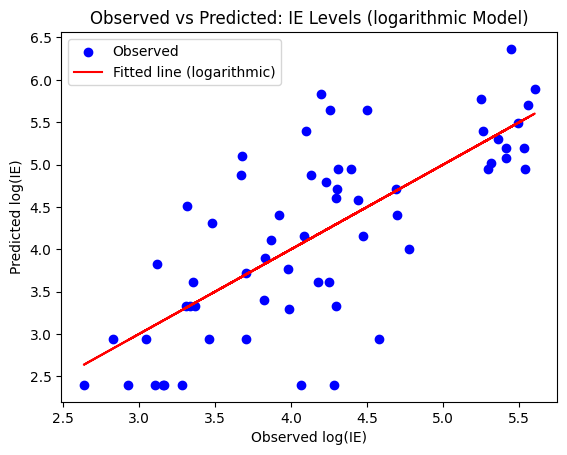

In [184]:
# Scatter plot of observed vs predicted values
plt.scatter(y_pred, y_log, color='blue', label='Observed')
plt.plot(y_pred, y_pred, color='red', label='Fitted line (logarithmic)') # red line
plt.title('Observed vs Predicted: IE Levels (logarithmic Model)')
plt.xlabel('Observed log(IE)')
plt.ylabel('Predicted log(IE)')
plt.legend()
plt.show()

Points follow a linear positive trend, despite some scatters. So the linearity assumption is not violated.

#### Homoscedasticity check


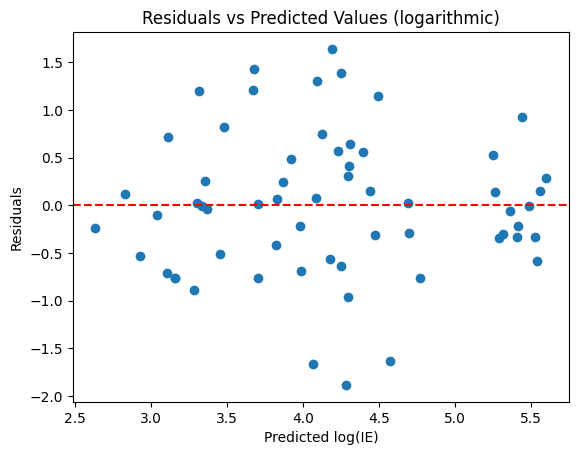

In [187]:
# Residuals from logarithmic model
residuals= y_log - y_pred

# Residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (logarithmic)')
plt.xlabel('Predicted log(IE)')
plt.ylabel('Residuals')
plt.show()

Residuals are spread evenly despite some agglomorations, they are not considered as clusters.


#### Normality of residuals

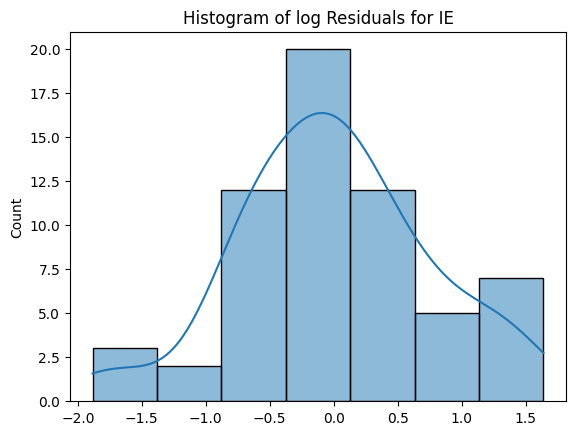

In [190]:
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of log Residuals for IE')
plt.show()

The residuals create close to bell-shaped distribution which supports the normality assumption for residuals.

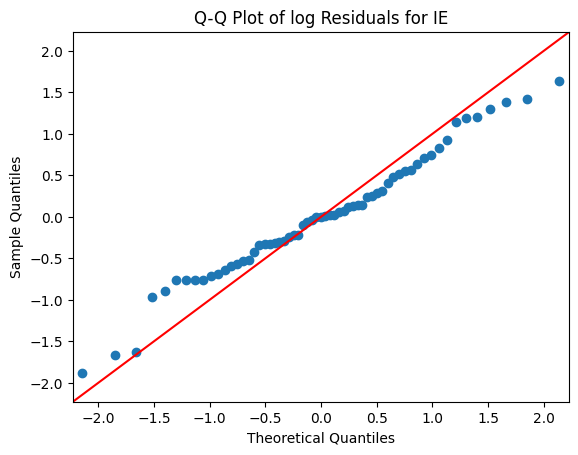

In [192]:
# Q-Q plot 
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of log Residuals for IE')
plt.show()